In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import json
import subprocess

from pathlib import Path
from scipy.io import loadmat, savemat

In [25]:
import subprocess

# Define your MATLAB function's arguments
N = 2**7 + 1  # Example value; adjust as needed
dt = 1e-4  # Example value; adjust as needed
T_end = 1  # Example value; adjust as needed
# mus = "0.01:0.01:0.02"  # MATLAB array syntax
mus = [0.05]
Mp = 10
K = T_end / dt
DS = 1
p = 2

In [26]:
# mu_start = 0.01
# mu_end = 0.01
# mu_step = 0

if len(mus) == 1:
    mu_start = mus[0]
    mu_end = mus[0]
    mu_step = 0
else:    

    # check and load data
    # convert mus to array of mus
    mus = np.array([float(m) for m in mus.split(':')])
    mus = np.arange(mus[0], mus[-1] + mus[1], mus[1])

    # round mus to 2 decimal places
    mus = np.round(mus, 2)


    mu_start = mus[0]
    mu_end = mus[-1]
    mu_step = mus[1] - mus[0]

    print(mu_start, mu_end, mu_step)

In [27]:
import json

datapath = '/data1/jy384/research/Data/UnimodalSROB/Burgers/'
srcpath = '/home/jy384/projects/UnimodalSROB/examples/burgers/'

config = {
    "N": 2**7 + 1,
    "dt": dt,
    "T_end": 1,
    # "mus": "0.01:0.01:0.1",
    "mus": list(mus),
    "Mp": Mp,
    "K": 1 / dt,  # T_end / dt
    "DS": 1,
    "params": {
        "modelform": "LQICP",
        "modeltime": "continuous",
        "dt": dt,
        "ddt_order": "2imp",
        "p": p, # polynomial order
        "lambda1": 0.1,
        "lambda2": 0.1,
        "lambda3": 320,
    }
}

config_path = Path(srcpath) / 'configs'/ f'config_mu_{mu_start}_{mu_step}_{mu_end}.json'
with open(config_path, 'w') as f:
    json.dump(config, f)


In [28]:
# Proper command to call your MATLAB function
matlab_cmd = (
    f"matlab -batch \"addpath('/home/jy384/projects/UnimodalSROB/examples/burgers/burgers-helpers'); "
    f"runburgers({N}, {dt}, {T_end}, [{mus}], {Mp}, {DS}, '{config_path}'); exit;\""
)

# Use subprocess to call MATLAB
subprocess.run(matlab_cmd, shell=True, check=True)

MATLAB is selecting SOFTWARE OPENGL rendering.
Running Burgers equation data generation
Parameters:
N = 129
dt = 0.0001
T_end = 1
mus = 0.05
Mp = 10
DS = 1
mu = 0.05
      100000           1



CompletedProcess(args='matlab -batch "addpath(\'/home/jy384/projects/UnimodalSROB/examples/burgers/burgers-helpers\'); runburgers(129, 0.0001, 1, [[0.05]], 10, 1, \'/home/jy384/projects/UnimodalSROB/examples/burgers/configs/config_mu_0.05_0_0.05.json\'); exit;"', returncode=0)

In [155]:
# # convert mus to array of mus
# mus = np.array([float(m) for m in mus.split(':')])
# mus = np.arange(mus[0], mus[-1] + mus[1], mus[1])

# # round mus to 2 decimal places
# mus = np.round(mus, 2)

In [11]:


trajectories_path = Path(datapath) / 'trajectories'
snapshots_path = Path(datapath) / 'snapshots'
snapshotsDerivatives_path = Path(datapath) / 'snapshotsDerivatives'

# Find the files 
U_all_files = list(Path(datapath).rglob(f'U_all_mu_*'))
X_all_files = list(Path(datapath).rglob(f'X_all_mu_*'))
R_all_files = list(Path(datapath).rglob(f'R_all_mu_*'))

# Load the data with the mu_start, mu_end, and mu_step in their names
if U_all_files:
    for file in U_all_files:
        if str(mu_start) + '_' in file.name and str(mu_end) in file.name and str(mu_step) + '_' in file.name:
            print(file)
            U_all = loadmat(file)['U_all']
if X_all_files:
    for file in X_all_files:
        if str(mu_start) + '_' in file.name and str(mu_end) in file.name and str(mu_step) + '_' in file.name:
            print(file)
            X_all = loadmat(file)['X_all']
if R_all_files:
    for file in R_all_files:
        if str(mu_start) + '_' in file.name and str(mu_end) in file.name and str(mu_step) + '_' in file.name:
            print(file)
            R_all = loadmat(file)['R_all']

/data1/jy384/research/Data/UnimodalSROB/Burgers/trajectories/U_all_mu_0.03_0_0.03.mat
/data1/jy384/research/Data/UnimodalSROB/Burgers/snapshots/X_all_mu_0.03_0_0.03.mat
/data1/jy384/research/Data/UnimodalSROB/Burgers/snapshotsDerivatives/R_all_mu_0.03_0_0.03.mat


In [12]:
# Convert cell arrays to numpy arrays for X_all and R_all
X_all = np.array([X_all[0][i] for i in range(X_all.shape[1])])
R_all = np.array([R_all[0][i] for i in range(R_all.shape[1])])

print(U_all.shape, X_all.shape, R_all.shape)

(100000, 1) (1, 129, 100000) (1, 129, 99800)


# SVD of X to get ROB 

In [13]:
# mus = np.linspace(0.01, 0.1, 10)
# mus = np.array([0.01])

S =  [932.47963886 209.49704414  87.37437416  51.85812058  26.11492521]
idx =  8
rel_err_SVD[idx] =  5.1312827153982e-07


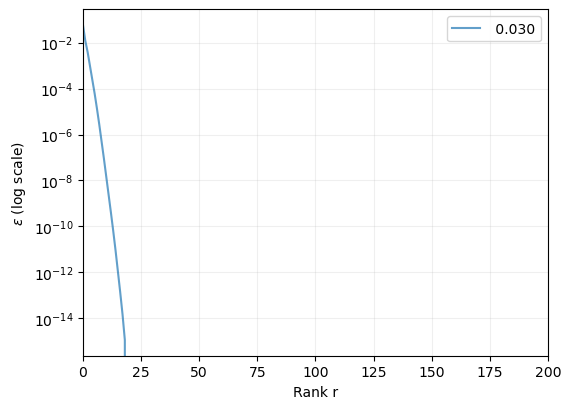

In [14]:
rob_lst = []
rel_err_SVD_lst = []
idx_lst = []
names = [f'{mu: .3f}' for mu in mus]

fig, ax = plt.subplots(figsize=(6, 4.5))


for i in range(len(mus)):
    # svd
    U, S, V = np.linalg.svd(X_all[i, :, :], full_matrices=False)
    print("S = ", S[:5])
    eigvals_SVD = S**2 * (1 / (K*Mp-1))
    # print("eigvals_SVD = \n", eigvals_SVD[:5])
    # append U
    # print("U = ", U.shape)
    rob_lst.append(U)
    
    # calculate the relative error
    rel_err_SVD = 1 - (np.cumsum(eigvals_SVD) / np.sum(eigvals_SVD))
    rel_err_SVD_lst.append(rel_err_SVD)
    # print("rel_err_SVD = \n", rel_err_SVD[:4])

    # print the first idx when it is less than 1e-4
    idx = np.where(rel_err_SVD <= 1e-6)[0][0]
    idx_lst.append(idx)
    print("idx = ", idx)
    print("rel_err_SVD[idx] = ", rel_err_SVD[idx])
    
    ax.plot(rel_err_SVD_lst[i], label=names[i], linestyle='-', alpha=0.7)
    ax.set_yscale('log')
    ax.set_ylabel("$\epsilon$ (log scale)")
    # set limit
    ax.set_xlim([0, 200])
    # ax.set_ylim([1e-13, 1e-3])
    # show grid
    ax.grid(True, alpha=0.2)
    ax.set_xlabel("Rank r")
    ax.legend()

In [15]:
proj_error_lst = []

for r in range(20):
    proj_error = (1/len(mus)) * np.sum([(np.linalg.norm(X_all[i, :, :] - rob_lst[i][:, :r] @ rob_lst[i][:, :r].T @ X_all[i, :, :], ord='fro')**2)/np.linalg.norm(X_all[i, :, :], ord='fro')**2 for i in range(len(mus))])
    # proj_error = (1/len(mus)) * np.sum([(np.linalg.norm(X_all[i, :, :] - X_all[i, :, :].T @ rob_lst[i][:, r] @ rob_lst[i][:, r].T, ord='fro')**2)/np.linalg.norm(X_all[i, :, :], ord='fro')**2 for i in range(len(mus))])
    print("proj_error = ", proj_error)
    proj_error_lst.append(proj_error)
        

proj_error =  1.0
proj_error =  0.059630326725432205
proj_error =  0.012165084760162358
proj_error =  0.003908735509238688
proj_error =  0.0010003401296211328
proj_error =  0.0002627799314469664
proj_error =  6.234708054202732e-05
proj_error =  1.3677898570292682e-05
proj_error =  2.7546779098127115e-06
proj_error =  5.131282718126709e-07
proj_error =  8.955668989114046e-08
proj_error =  1.50550372643745e-08
proj_error =  2.495014139020839e-09
proj_error =  4.0865997677893846e-10
proj_error =  6.365551582335999e-11
proj_error =  9.032299120013343e-12
proj_error =  1.1599510364643302e-12
proj_error =  1.369298433586517e-13
proj_error =  1.5241703227623993e-14
proj_error =  1.6407125040626273e-15


idx =  9


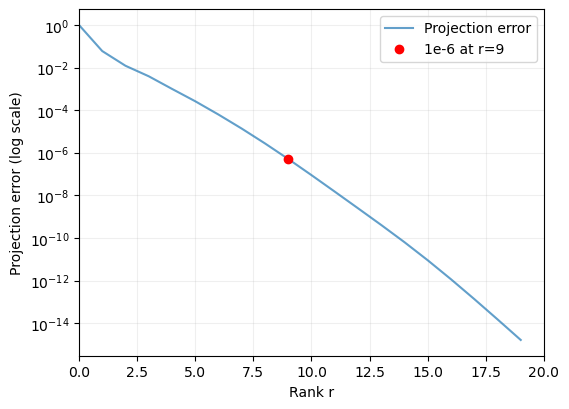

In [16]:
# plot the projection error
fig, ax = plt.subplots(figsize=(6, 4.5))
ax.plot(proj_error_lst, label="Projection error", linestyle='-', alpha=0.7)

# plot the first idx when it is less than 1e-5
idx = np.where(np.array(proj_error_lst) < 1e-6)[0][0]
print("idx = ", idx)
ax.plot(idx, proj_error_lst[idx], 'ro', label=f"1e-6 at r={idx}")

ax.set_yscale('log')
ax.set_ylabel("Projection error (log scale)")
# set limit
ax.set_xlim([0, 20])
# ax.set_ylim([1e-13, 1e-3])
# show grid
ax.grid(True, alpha=0.2)
ax.set_xlabel("Rank r")
ax.legend()
plt.show()

# Define truncation order r

In [17]:
# r = np.max(idx_lst)
r = 15
print("r = ", r)

print("Shape of the robs = ", np.array(rob_lst).shape)

r =  15
Shape of the robs =  (1, 129, 129)


# Get the ROBs and save them for matlab OpInf routine

In [18]:
# rob_lst = np.array(rob_lst)
# print("rob_lst = ", rob_lst.shape)

# truncation of the ROBs
# rob_lst = rob_lst[:, :, :r]
# print("truncated rob_lst = ", rob_lst.shape)

# # make it a suitable shape for matlab routine, where ROBs are stored in the third dimension
# rob_lst = np.moveaxis(rob_lst, 0, 2)
# print("rob_lst = ", rob_lst.shape)

rob_arr = []

for i in range(len(mus)):
    rob_arr.append(rob_lst[i][:, :r])
    
rob_arr = np.array(rob_arr)
print("rob_arr = ", rob_arr.shape)

rob_arr = np.transpose(rob_arr, (1, 2, 0))
print("rob_arr = ", rob_arr.shape)
    

rob_arr =  (1, 129, 15)
rob_arr =  (129, 15, 1)


In [19]:
# save the ROBs as Vr_all.mat at datapath
# savemat(f'{datapath}/Vr_all.mat', {'Vr_all': rob_lst})
ROBs_path = Path(datapath) / 'ROBs'
savemat(f'{ROBs_path}/Vr_all_mu_{mu_start}_{mu_step}_{mu_end}.mat', {'Vr_all': rob_arr})

# Matlab routine for OpInf

In [20]:
# params.modelform = 'LQI';           % model is linear-quadratic with input term
# params.modeltime = 'continuous';    % learn time-continuous model
# params.dt        = dt;              % timestep to compute state time deriv
# params.ddt_order = '1ex';           % explicit 1st order timestep scheme

# % Inputs:
# %   - params: parameters for the operator inference, including:
# %       - modelform: model form of the operator
# %       - modeltime: model time of the operator
# %       - dt: timestep to compute state time derivative
# %       - ddt_order: explicit 1st order timestep scheme
# %   - mus: parameter values
# %   - r: POD basis order
# %   - X_all: state data
# %   - R_all: RHS data (residual)
# %   - U_all: input data
# %   - Vr_all: truncated POD basis


# update config file with truncation order r
config['robparams'] = {
    "r": int(r)
}

# with open(Path(srcpath) / 'config.json', 'w') as f:
#     json.dump(config, f)



config_path = Path(srcpath) / 'configs'/ f'config_mu_{mu_start}_{mu_step}_{mu_end}.json'
with open(config_path, 'w') as f:
    json.dump(config, f)


matlab_opinf_cmd = (
    f"matlab -batch \"addpath('/home/jy384/projects/UnimodalSROB/examples/burgers/'); "
    f"run_burgersOpInf('{config_path}'); exit;\""
)

# Use subprocess to call MATLAB
subprocess.run(matlab_opinf_cmd, shell=True, check=True)

MATLAB is selecting SOFTWARE OPENGL rendering.
    Vr_all: [129x15 double]

Xsq shape: 
      100000         120

Number of polynomial terms: 345
Size of A

ans =

      100000         482

Size of b

ans =

       99800          15

Size of Aplus

ans =

      100482         482

Size of bplus

ans =

      100282          15

Solving...


Error using \
Matrix dimensions must agree.

Error in tikhonov_poly (line 77)
    x = Aplus\bplus;

Error in inferOperators (line 120)
temp = tikhonov_poly(rhs, D, sizeparams, params.lambda1, params.lambda2,
params.lambda3);

Error in burgersOpInf (line 75)
        [operators] = inferOperators(X, U, Vr, params, R);

Error in run_burgersOpInf (line 82)
    [infop_all] = burgersOpInf(params, Mp, mus, r, data);
 


CalledProcessError: Command 'matlab -batch "addpath('/home/jy384/projects/UnimodalSROB/examples/burgers/'); run_burgersOpInf('/home/jy384/projects/UnimodalSROB/examples/burgers/configs/config_mu_0.03_0_0.03.json'); exit;"' returned non-zero exit status 1.

In [ ]:
# Read s_ref_all.mat and s_rec_all.mat
reconstructedState_path = Path(datapath) / 'reconstructedState'
referenceState_path = Path(datapath) / 'referenceState'
s_ref_all = loadmat(f'{referenceState_path}/s_ref_all_mu_{mu_start}_{mu_step}_{mu_end}.mat')['s_ref_all']
s_rec_all = loadmat(f'{reconstructedState_path}/s_rec_all_mu_{mu_start}_{mu_step}_{mu_end}.mat')['s_rec_all']

# extract the tensors from the cell arrays
s_ref_all = np.array([s_ref_all[i][0] for i in range(s_ref_all.shape[0])])
s_rec_all = np.array([s_rec_all[i][0] for i in range(s_rec_all.shape[0])])

X =  (129, 10001)
Y =  (129, 10001)
s_ref_all[i] =  (129, 10001)


/tmp/ipykernel_3404677/3340207870.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


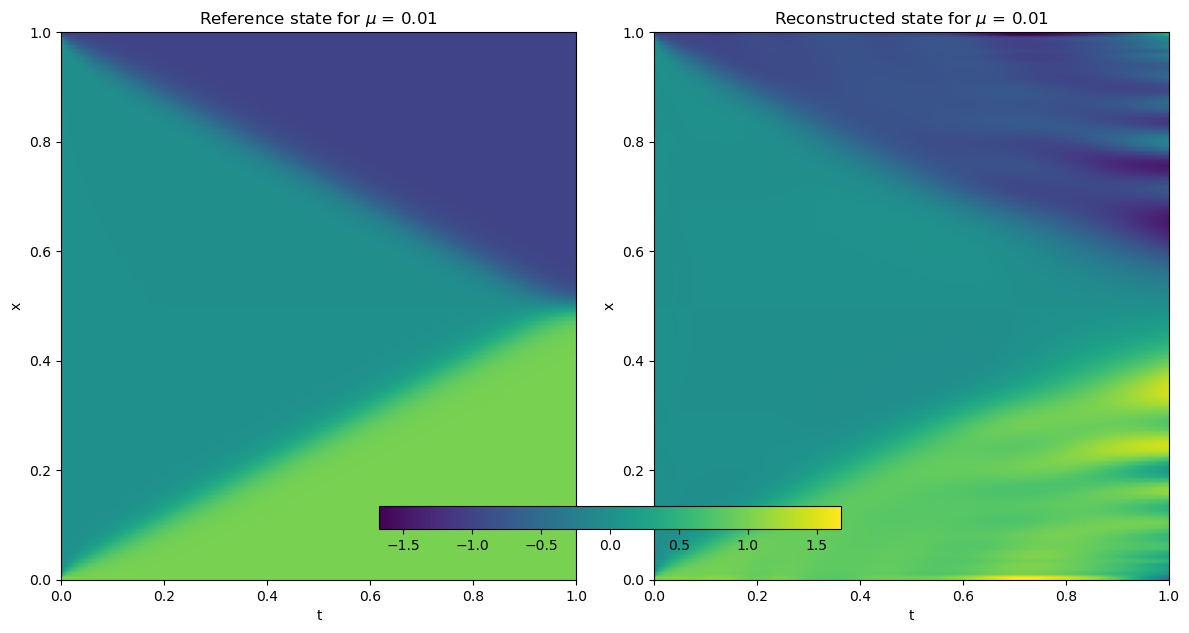

X =  (129, 10001)
Y =  (129, 10001)
s_ref_all[i] =  (129, 10001)


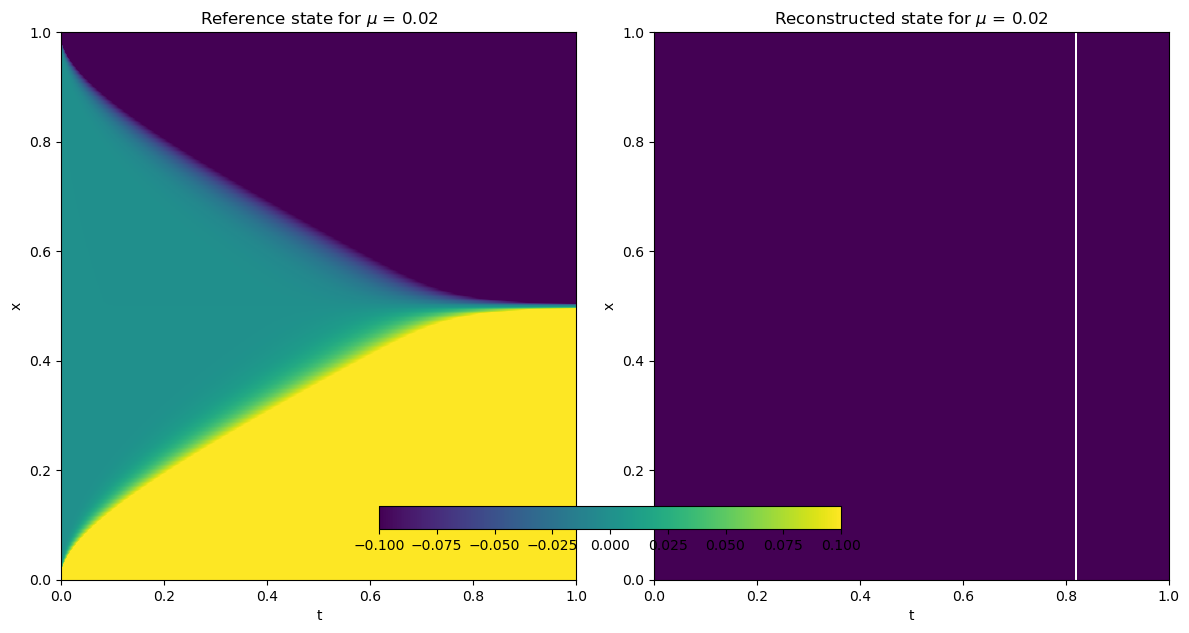

In [178]:
# plot the results side by side
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming s_ref_all is a list of 2D numpy arrays
for i in range(len(mus)):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    X, Y = np.meshgrid(np.linspace(0.0, T_end, int(K+1)), np.linspace(0.0, 1.0, N))
    print("X = ", X.shape)
    print("Y = ", Y.shape)
    print("s_ref_all[i] = ", s_ref_all[i].shape)
    # s = ax.plot_surface(X, Y, s_ref_all[i].reshape(N, int(K+1)), cmap='viridis')
    c1 = axs[0].imshow(s_ref_all[i].reshape(N, int(K+1)), extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)], origin='lower', aspect='auto')
    # plot the trajectory of x coordinate across time, x-axis is time, y-axis is x
    # axs[0].scatter(np.linspace(0.0, T_end, U_all.shape[0]), U_all[:, i], color='red', s=1)
    # fig.colorbar(c)
    axs[0].set_xlabel('t')
    axs[0].set_ylabel('x')
    axs[0].set_title(f'Reference state for $\mu$ = {mus[i]}')
    
    c2 = axs[1].imshow(s_rec_all[i].reshape(N, int(K+1)), extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)], origin='lower', aspect='auto')
    
    # fig.colorbar(c)
    axs[1].set_xlabel('t')
    axs[1].set_ylabel('x')
    axs[1].set_title(f'Reconstructed state for $\mu$ = {mus[i]}')  
    
    # use same colorbar for both plots, the range is determined by the maximum and minimum values of the two plots
    vmin = np.min([np.min(s_ref_all[i]), np.min(s_rec_all[i])])
    vmax = np.max([np.max(s_ref_all[i]), np.max(s_rec_all[i])])
    c1.set_clim(vmin=vmin, vmax=vmax)
    c2.set_clim(vmin=vmin, vmax=vmax)
    
    fig.colorbar(c1, ax=axs, orientation='horizontal', fraction=0.05, pad=0.05)
    plt.tight_layout()
    
    
    plt.show()

In [168]:
# calculate characteristic velocity of the system
np.mean(np.abs(R_all[0]))

36.71646165619607